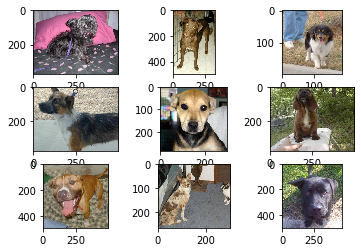

In [14]:
# plot dog photos from the dogs vs cats dataset
from matplotlib import pyplot
from matplotlib.image import imread
# define location of dataset
folder = 'train/'
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# define filename
	filename = folder + 'dog.' + str(i) + '.jpg'
	# load image pixels
	image = imread(filename)
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

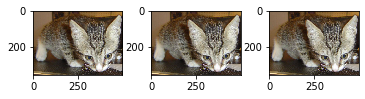

In [27]:
from matplotlib import pyplot
from matplotlib.image import imread
folder = 'train/'

pyplot.subplot(331)
pyplot.imshow(imread('train/cat.300.jpg'))
pyplot.subplot(332)
pyplot.imshow(imread('train/cat.300.jpg'))
pyplot.subplot(333)
pyplot.imshow(imread('train/cat.300.jpg'))

# for i in range(9):
#     pyplot.subplot(330 + 1 + i)
#     filename = folder + 'cat.' + str(i) + '.jpg'
#     image = imread(filename)
#     pyplot.imshow(image)
# pyplot.show()

In [28]:
from os import listdir
from numpy import asarray
from numpy import save
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

folder = 'train/'
photos, labels = list(), list()


In [35]:
for file in listdir(folder):
    output = 0.0
    # folder의 파일 이름 'file'이  cat이면 output이 1임
    if file.startswith('cat'):
        output=1.0
    # 사진을 200X200 사이즈로 한장씩 불러온다.
    photo = load_img(folder + file, target_size = (200,200))
    # 불러온 이미지를 array로 변환
    photo = img_to_array(photo)
    # 저장
    photos.append(photo)
    labels.append(output)
# numpy array 형태로 변환
photos = asarray(photos)
labels = asarray(labels)

print(photos.shape, labels.shape)
save('dogs_vs_cats_photos.npy', photos)
save('dogs_vs_cats_labels.npy', labels)

MemoryError: Unable to allocate 11.2 GiB for an array with shape (25000, 200, 200, 3) and data type float32

RAM이 12기가 미만일 경우 200X200 사진을 25000장 올리기 때문에 부족할 수 있다.  
  
실제로 부족해서 안돌아감

사진을 표준 디렉토리로 전처리 하기

keras의 ImageDataGenerator class와 _flow_from_directory()_ API를 사용해보자

이 API는 _train/_ 과 _test/_ 디렉토리로 데이터를 나누어준다. 그리고 각 디렉토리 안에 서브디렉토리를 각 클래스 별로 나누어준다. e.g _train/dog/_ 과 _train/cat/_  
  
우리는 사전에 정의한 구조로 데이터셋의 사본을 만들 수 있다.  
우리는 random 데이터셋 25% 짜리도 만들 수 있다.

dataset_dogs_vs_cats  
├── test  
│   ├── cats   
│   └── dogs  
└── train  
    ├── cats  
    └── dogs  

Python에서는 디렉토리를 _makedirs()_ 을 사용하여 만들 수 있습니다.  
반복문을 사용하여 _dog/_ 와 _cat/_ 서브디렉토리를 만들어봅시다

In [38]:
from os import makedirs

# 디렉토리 만들기
dataset_home = 'dataset_dogs_vs_cats/'
subdirs = ['train/', 'test/']
for subdir in subdirs:
    # 서브디렉토리 만들기
    labeldirs = ['dogs/', 'cats/']
    for labeldir in labeldirs:
        newdir = dataset_home + subdir + labeldir
        makedirs(newdir, exist_ok=True)


다음, 데이터셋에 있는 모든 이미지들을 dogs/ 와 cats/ 폴더에 넣어봅시다.  
  
추가적으로, 25% 의 데이터셋을 버릴겁니다. 

In [42]:
from random import random
from random import seed
from shutil import copyfile
seed(1)
# define ratio of pictures to use for validation
val_ratio = 0.25
# copy training dataset images into subdirectories
src_directory = 'train/'
for file in listdir(src_directory):
	src = src_directory + '/' + file
	dst_dir = 'train/'
	if random() < val_ratio:
		dst_dir = 'test/'
	if file.startswith('cat'):
		dst = dataset_home + dst_dir + 'cats/'  + file
		copyfile(src, dst)
	elif file.startswith('dog'):
		dst = dataset_home + dst_dir + 'dogs/'  + file
		copyfile(src, dst)

# 레이블 생성
We're dealing with a binary classification problem here - (1) dog (0) cat. The lables can be created by looping over the file names in the train directory. It's nice to see the training data is perfectly balanced.

In [13]:
labels = []
for i in train_images:
    if 'dog' in i:
        labels.append(1)
    else:
        labels.append(0)

sns.countplot(labels)
sns.plt.title('Cats and Dogs')

NameError: name 'sns' is not defined

# Checking out Cats and Dogs
A quick side-by-side comparison of the animals.

In [ ]:
def show_cats_and_dogs(idx):
    cat = read_image(train_cats[idx])
    dog = read_image(train_dogs[idx])
    pair = np.concatenate((cat, dog), axis=1)
    plt.figure(figsize)=(10, 5))
    plt.imshow(pair)
    plt.show()
    
for idx in range(0,5):
    show_cats_and_dogs(idx)